In [18]:
import GPyOpt
from GPyOpt.methods import BayesianOptimization
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt

In [11]:
bounds = [{'name': 'mu_1', 'type': 'continuous', 'domain': (0,100)},
         {'name': 'mu_2', 'type': 'continuous', 'domain': (0,100)}
         ]


constraints = [
    {'name': 'constr_1', 'constraint': 'x[:,1]+x[:,0]-100'},
    {'name': 'constr_2', 'constraint': '-x[:,1]+np.sqrt(6/5)'},
]

In [12]:
def f(X):
    lower, upper = X[0]
    if lower+upper > 100:
        print("WHAT!")
    t = st.uniform(lower,upper).rvs(10000)
    return sum(t)

In [13]:
#Determine the subset where we are allowed to sample
feasible_region = GPyOpt.Design_space(space = bounds, constraints = constraints) 
initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, 10)

#CHOOSE the objective
objective = GPyOpt.core.task.SingleObjective(f)

# CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=10,verbose=False)

#CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

#CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

#CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [14]:
bo = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)

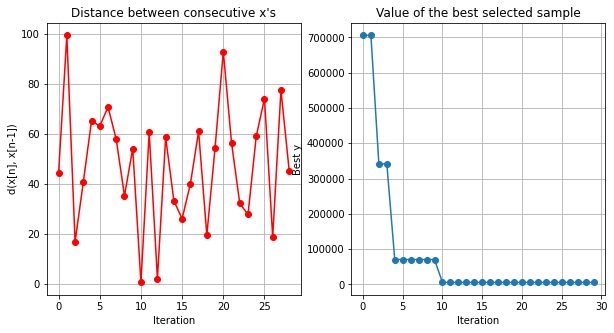

In [15]:
bo.suggest_next_locations

# --- Stop conditions
max_time  = None 
max_iter  = 20
tolerance = 1e-8     # distance between two consecutive observations 
                     # if we're sampling a region in such fine detail then it is likely that we've found the true min.

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 
bo.plot_convergence()

In [10]:
print(bo.x_opt)
print(bo.fx_opt)

[0.08247916 1.09545411]
6281.848662920665


In [28]:
X_step = np.asarray([[0,1]])
Y_step = np.asarray([[f(X_step)]])
bo_step = BayesianOptimization(f = None, domain = initial_design, X = X_step, Y = Y_step)

[[4968.69747917]]


AttributeError: 'numpy.ndarray' object has no attribute 'get'

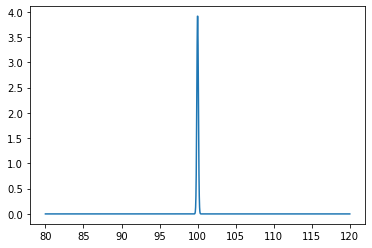

In [21]:
x = np.linspace(80,120,1000)
plt.plot(x,st.norm.pdf(x,100,0.1))